<a href="https://colab.research.google.com/github/alaahossam/Networks-Anomaly-Detection/blob/master/Network_Anomaly_Detection_6750_6870_6952.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Anomaly Detection



## Data preprocessing

### Import needed libraries.

In [ ]:
import sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,normalize
from sklearn.metrics import classification_report, accuracy_score,f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import math

### Generate training and test sets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1 = '/content/drive/MyDrive/kddcup.data_10_percent/kddcup.data_10_percent'
path2 = '/content/drive/MyDrive/corrected/corrected'
train_df = pd.read_csv(path1)
test_df = pd.read_csv(path2)
#train_nodup= train_df.drop_duplicates()
#test_nodup= test_df.drop_duplicates()

In [ ]:
ytrain_df = train_df.iloc[:,-1]
train_df = train_df.drop(train_df.columns[-1], axis=1)

In [ ]:
g = ytrain_df.unique()
g = list(g)
#print(g)
#print(len(g))
#test_df = pd.DataFrame(test_df)
test_df = test_df[(test_df.iloc[:,-1].isin(g))]
#test_df = test_df.drop(test_df[test_df.columns[41] in g].index, inplace=True)

In [ ]:
ytest_df = test_df.iloc[:,-1]
test_df = test_df.drop(test_df.columns[-1], axis=1)

In [ ]:
#ct = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),[1,2,3]),remainder = 'passthrough')
#train_df = ct.fit_transform(train_df)
#test_df = ct.fit_transform(test_df)
D_train = np.asarray(train_df)
D_test = np.asarray(test_df)
#print(D_train.shape)
#print(test_df.shape)

In [ ]:
y_train = ytrain_df.to_numpy()
y_test = ytest_df.to_numpy()

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

X = np.concatenate((D_train,D_test))

le1 = LabelEncoder()
le1.fit(X[:,1])
D_train[:, 1] = le1.transform(D_train[:, 1])
D_test[:, 1] = le1.transform(D_test[:, 1])

le2 = LabelEncoder()
le2.fit(X[:,2])
D_train[:, 2] = le2.transform(D_train[:, 2])
D_test[:, 2] = le2.transform(D_test[:, 2])

le3 = LabelEncoder()
le3.fit(X[:,3])
D_train[:, 3] = le3.transform(D_train[:, 3])
D_test[:, 3] = le3.transform(D_test[:, 3])


Scaling the training data

In [ ]:
print("data before scaling: ",D_train)
scaler1 = MinMaxScaler()
scaler1.fit(D_train)
D_train_s = scaler1.transform(D_train)
print("Data after scaling",D_train_s)

data before scaling:  [[0 1 22 ... 0.0 0.0 0.0]
 [0 1 22 ... 0.0 0.0 0.0]
 [0 1 22 ... 0.0 0.0 0.0]
 ...
 [0 1 22 ... 0.01 0.0 0.0]
 [0 1 22 ... 0.01 0.0 0.0]
 [0 1 22 ... 0.01 0.0 0.0]]
Data after scaling [[0.         0.5        0.33333333 ... 0.         0.         0.        ]
 [0.         0.5        0.33333333 ... 0.         0.         0.        ]
 [0.         0.5        0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.5        0.33333333 ... 0.01       0.         0.        ]
 [0.         0.5        0.33333333 ... 0.01       0.         0.        ]
 [0.         0.5        0.33333333 ... 0.01       0.         0.        ]]


Scaling the testing data

In [ ]:
print("data before scaling: ",D_test) 
scaler2 = MinMaxScaler()
scaler2.fit(D_test)
D_test_s = scaler2.transform(D_test)
print("Data after scaling",D_test_s)

data before scaling:  [[0 2 46 ... 0.0 0.0 0.0]
 [0 2 46 ... 0.0 0.0 0.0]
 [0 2 11 ... 0.0 0.0 0.0]
 ...
 [0 2 46 ... 0.0 0.0 0.0]
 [0 2 46 ... 0.0 0.0 0.0]
 [0 2 46 ... 0.0 0.0 0.0]]
Data after scaling [[0.         1.         0.6969697  ... 0.         0.         0.        ]
 [0.         1.         0.6969697  ... 0.         0.         0.        ]
 [0.         1.         0.16666667 ... 0.         0.         0.        ]
 ...
 [0.         1.         0.6969697  ... 0.         0.         0.        ]
 [0.         1.         0.6969697  ... 0.         0.         0.        ]
 [0.         1.         0.6969697  ... 0.         0.         0.        ]]


## Accuracy Measures

In [ ]:
def evaluate(y_prd,y_trn,act_lbl):  
  x = set(y_prd)
  dct_p = {}
  dct_t = {}
  dct_e = {}
  for i in x:
    dct_p['clst_%s' % i] = []
    dct_t['clst_%s' % i] = []
    dct_e['clst_%s' % i] = []
    for j in range (len(y_prd)):
      if y_prd[j] == i:
        dct_p['clst_%s' % i].append(y_prd[j])
        dct_t['clst_%s' % i].append(y_trn[j])
  
  #print(dct_p['clst_0'])

  for i in (set(y_prd)):
    for j in range (len(dct_p['clst_%s' % i])):
      dct_p['clst_%s' % i][j] = act_lbl[i]

  #print(dct_p['clst_0'])
  #print(dct_p['clst_6'])         

  for i in (set(y_prd)):
    cnt = 0.0
    prec = 0.0
    rec = 0.0
    f1 = 0.0
    for j in range (len(dct_p['clst_%s' % i])):
      if dct_t['clst_%s' % i][j] == dct_p['clst_%s' % i][j]:
        cnt += 1
    prec = float(cnt / (len(dct_p['clst_%s' % i])))
    dct_e['clst_%s' % i].append(prec)
    #print(prec)
    rec = float(cnt / (list(y_trn).count(act_lbl[i])))
    dct_e['clst_%s' % i].append(rec)
    #print(rec)
    if rec == 0.0 and prec == 0.0:
      f1 = 0.0
    else:  
      f1 = float((2*prec*rec))/float((prec+rec))
    dct_e['clst_%s' % i].append(f1)
  #print(dct_e) 
  
  for i in (set(y_prd)):
    ent_c = 0
    for j in set(dct_t['clst_%s' % i]):
      prob = ((dct_t['clst_%s' % i]).count(j)) /(len(dct_t['clst_%s' % i]))
      ent_e = -(prob * math.log2(prob))
      ent_c += ent_e
    dct_e['clst_%s' % i].append(ent_c)
    ent_cp = ent_c * (len(dct_t['clst_%s' % i])/len(y_trn))
    dct_e['clst_%s' % i].append(ent_cp)

  p = 0.0
  r = 0.0
  f = 0.0
  e = 0.0
  for i in (set(y_prd)):
    p += dct_e['clst_%s' % i][0] 
    r += dct_e['clst_%s' % i][1] 
    f += dct_e['clst_%s' % i][2]
    e += float(dct_e['clst_%s' % i][4])
  total_prec = float(p / len(set(y_prd))) 
  total_rec = float(r / len(set(y_prd)))
  total_f1 = float(f / len(set(y_prd)))
  total_cent = float(e) 

  for i in (set(y_prd)):
    print("For cluster :", i)
    print(" Precision = ", dct_e['clst_%s' % i][0] )
    print(" Recall = ", dct_e['clst_%s' % i][1] )
    print(" F1 Measure = ", dct_e['clst_%s' % i][2] )
    print(" Conditional Entropy = ", dct_e['clst_%s' % i][3] )
    print("\n")

  print("Total Meaures:\n")
  print("Precision =",total_prec,"\n")
  print("Recall =",total_rec,"\n")
  print("F1 Measure =",total_f1,"\n")
  print("Conditional Entropy =",total_cent,"\n")
  return 


## KMeans Clustering

### KMeans Clustering Algorithm

In [ ]:
#majority label function to detect the majority in each cluster
def majority_label(arr):
  label_counts = {}
  for label in arr:
    if label in label_counts:
      label_counts[label] += 1
    else:
      label_counts[label] = 1  
  majority = None
  max = 0
  for label, cnt in label_counts.items():
    if cnt > max:
      majority = label
      max = cnt
  return majority

def actual_clusters(k,ypred,y_truth):
  act_clusters=[]
  for j in range(k):
    temp=[]
    for i in range(len(ypred)):
      if ypred[i]==j:
        temp.append(y_truth[i])        
    act_clusters.append(majority_label(temp))        
  return act_clusters

def actual_labels(ypred,act_clusters): 
  act_ypred = []
  for i in ypred:
    act_ypred.append(act_clusters[i])
  return act_ypred

In [ ]:
def kmeans(data, num_clusters, max_itr,seed):
  k =num_clusters
  data = np.array(data, dtype = float)
  n = data.shape[0]

  m = data.shape[1]
  cent = np.zeros((k,data.shape[1]), dtype = float)
  noc = num_clusters

  if(seed is None):
    l = list(range(0,data.shape[0]-1))
    for i in range (k):
      x = np.random.choice(l,size = 1, replace = False)
      while any(np.array_equal(z,np.array(data[x].flatten())) for z in cent):
        x = np.random.choice(l,size = 1, replace = False)
      cent[i]= np.array(data[x], dtype = float)

  else:
    cent =seed
# old centroids
  old_centroids = np.zeros(cent.shape)
#new centroids
  new_centroids = np.zeros(cent.shape)
#create error vector r
  maxit = max_itr
  distance = np.zeros((n,k))
  r = 0 
#create new clusters
#After an update,if the estimate of that center stays the same, exit loop
  while r < maxit:
    r +=1
    clusters = np.zeros(n)
# Measure the distance to every center
    for i in range(num_clusters):
      distance[:,i] = np.linalg.norm(data - cent[i], axis=1)
# Assign all training data to closest center(labeling the points)
    clusters = np.argmin(distance, axis = 1)
    old_centroids = deepcopy(cent)
    cent = new_centroids
    j = 0
# Calculate mean for every cluster and update the centroids
    for i in range(num_clusters):
      if i in np.unique(clusters):
        new_centroids[i] = np.mean(data[clusters == i], axis=0)
        j+=1
  return old_centroids,new_centroids,clusters

### K = 7

KMeans for k = 7 on training set

Evaluation on K=7 (Training set)

In [ ]:
k=7
c_old_7,c_new_7,y_predt_7=kmeans(D_train_s,k, 30,None)
act_lbl_7 = actual_clusters(7,y_predt_7,y_train)
act_y_predt_7 =  actual_labels(y_predt_7,act_lbl_7)
evaluate(y_predt_7,y_train,act_lbl_7)

For cluster : 0
 Precision =  0.9537099504077454
 Recall =  0.8283355777830319
 F1 Measure =  0.8866124577753814
 Conditional Entropy =  0.3427786893080907


For cluster : 1
 Precision =  0.9956748306409589
 Recall =  0.356470555311984
 F1 Measure =  0.5249860902178168
 Conditional Entropy =  0.04774855409798316


For cluster : 2
 Precision =  0.9963864079663279
 Recall =  0.45269167265230736
 F1 Measure =  0.6225417880004618
 Conditional Entropy =  0.03519199795294428


For cluster : 3
 Precision =  0.8385315624533651
 Recall =  0.11552576662520431
 F1 Measure =  0.20307375382863957
 Conditional Entropy =  1.0084958524602687


For cluster : 4
 Precision =  0.9943568038989354
 Recall =  0.055222764343459525
 F1 Measure =  0.10463452817965882
 Conditional Entropy =  0.050268961409191334


For cluster : 5
 Precision =  0.7257343550446999
 Recall =  0.19082844376451713
 F1 Measure =  0.3021958947920437
 Conditional Entropy =  1.2034998739049851


For cluster : 6
 Precision =  0.9999924602

KMeans for k = 7 on test set

Evaluation on K=7 (Testset)

In [ ]:
k=7
c_old1,c_new1,y_pred_7=kmeans(D_test_s,k, 30,c_new_7)
act_y_pred_7 =  actual_labels(y_pred_7,act_lbl_7)
evaluate(y_pred_7,y_test,act_lbl_7)

For cluster : 0
 Precision =  0.9142787246187719
 Recall =  0.9251881436493267
 F1 Measure =  0.9197010836129181
 Conditional Entropy =  0.500076759336662


For cluster : 1
 Precision =  0.9919882275997384
 Recall =  0.2092032895984552
 F1 Measure =  0.34553557444506144
 Conditional Entropy =  0.07349022616694748


For cluster : 2
 Precision =  0.9853893101535047
 Recall =  0.09186048516404889
 F1 Measure =  0.16805450416351247
 Conditional Entropy =  0.11000294645250495


For cluster : 3
 Precision =  0.5816457730633237
 Recall =  0.05972735674676525
 F1 Measure =  0.10833058939743168
 Conditional Entropy =  1.8129339637501196


For cluster : 4
 Precision =  0.9923069933670533
 Recall =  0.19966360129440372
 F1 Measure =  0.33243703959250764
 Conditional Entropy =  0.07328511762209243


For cluster : 5
 Precision =  0.961664373487688
 Recall =  0.6989189841554456
 F1 Measure =  0.8095052668364034
 Conditional Entropy =  0.27967299860941097


For cluster : 6
 Precision =  0.99514975142

In [ ]:
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score
print("acc:",accuracy_score(list(y_test),act_y_pred_7))
print("f1 macro:",f1_score(list(y_test),act_y_pred_7,average = 'macro'))
print("f1 weighted:",f1_score(list(y_test),act_y_pred_7,average = 'weighted'))
print("rec macro:",recall_score(list(y_test),act_y_pred_7,average = 'macro'))
print("rec weighted:",recall_score(list(y_test),act_y_pred_7,average = 'weighted'))
print("prec macro:",precision_score(list(y_test),act_y_pred_7,average = 'macro'))
print("prec weighted:",precision_score(list(y_test),act_y_pred_7,average = 'weighted'))

acc: 0.9640026137619355
f1 macro: 0.1387529846851516
f1 weighted: 0.9484198374279479
rec macro: 0.14215223068267493
rec weighted: 0.9640026137619355


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


prec macro: 0.13563925774220184
prec weighted: 0.9340807105393717


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K = 15

KMeans for k = 15 on training set

Evaluation on K=15 (Training set)

In [ ]:
k=15
c_old_15,c_new_15,y_predt_15=kmeans(D_train_s,k, 30,None)
act_lbl_15 = actual_clusters(k,y_predt_15,y_train)
act_y_predt_15 =  actual_labels(y_predt_15,act_lbl_15)
evaluate(y_predt_15,y_train,act_lbl_15)

For cluster : 0
 Precision =  0.9722703639514731
 Recall =  0.005767036401204807
 F1 Measure =  0.011466061683732908
 Conditional Entropy =  0.19222800459754388


For cluster : 1
 Precision =  1.0
 Recall =  0.0004344884077068272
 F1 Measure =  0.0008685994190351428
 Conditional Entropy =  0.0


For cluster : 2
 Precision =  0.9985879861151968
 Recall =  0.060447309377114566
 F1 Measure =  0.11399423077568865
 Conditional Entropy =  0.015404656376415634


For cluster : 3
 Precision =  0.9185286677908938
 Recall =  0.08958952270320836
 F1 Measure =  0.16325574860675315
 Conditional Entropy =  0.520387698458607


For cluster : 4
 Precision =  0.8991253131730473
 Recall =  0.19081911549332561
 F1 Measure =  0.31482393499138145
 Conditional Entropy =  0.5893384629803557


For cluster : 5
 Precision =  0.987658869036655
 Recall =  0.05512094328566876
 F1 Measure =  0.10441454248047825
 Conditional Entropy =  0.1000727924094658


For cluster : 6
 Precision =  0.9963473466574776
 Recall =  0.

In [ ]:
k=15
c_old1,c_new1,y_pred_15=kmeans(D_test_s,k, 30,c_new_15)
act_y_pred_15 =  actual_labels(y_pred_15,act_lbl_15)
evaluate(y_pred_15,y_test,act_lbl_15)

For cluster : 0
 Precision =  0.15333333333333332
 Recall =  0.0018979403221547398
 F1 Measure =  0.003749470183561019
 Conditional Entropy =  1.1964763794695354


For cluster : 1
 Precision =  1.0
 Recall =  0.0005850412271239739
 F1 Measure =  0.0011693983080268231
 Conditional Entropy =  0.0


For cluster : 2
 Precision =  0.9986892641589953
 Recall =  0.19966360129440372
 F1 Measure =  0.332793287861166
 Conditional Entropy =  0.014440581831073633


For cluster : 3
 Precision =  0.8665120900960583
 Recall =  0.043174016371798254
 F1 Measure =  0.08224992532738049
 Conditional Entropy =  0.6413430556707663


For cluster : 4
 Precision =  0.9723434876469177
 Recall =  0.6989017430733953
 F1 Measure =  0.8132529516205074
 Conditional Entropy =  0.185842415745335


For cluster : 5
 Precision =  0.994751715785224
 Recall =  0.04066543438077634
 F1 Measure =  0.07813664399308695
 Conditional Entropy =  0.04935530856291907


For cluster : 6
 Precision =  0.9902984227845228
 Recall =  0.30

In [ ]:
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score
print("acc:",accuracy_score(list(y_test),act_y_pred_15))
print("f1 macro:",f1_score(list(y_test),act_y_pred_15,average = 'macro'))
print("f1 weighted:",f1_score(list(y_test),act_y_pred_15,average = 'weighted'))
print("rec macro:",recall_score(list(y_test),act_y_pred_15,average = 'macro'))
print("rec weighted:",recall_score(list(y_test),act_y_pred_15,average = 'weighted'))
print("prec macro:",precision_score(list(y_test),act_y_pred_15,average = 'macro'))
print("prec weighted:",precision_score(list(y_test),act_y_pred_15,average = 'weighted'))

acc: 0.963509967533245
f1 macro: 0.1424672981527595
f1 weighted: 0.9487196514627407
rec macro: 0.144270537777097
rec weighted: 0.963509967533245


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


prec macro: 0.146309239941931
prec weighted: 0.9358109487804293


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K = 23

Best performance according to total precision in training set and test set is at k = 23.

In addition to it is better than Normalized cut at k = 23.

In [ ]:
k=23
c_old_23,c_new_23,y_predt_23=kmeans(D_train_s,k, 30,None)
act_lbl_23 = actual_clusters(k,y_predt_23,y_train)
act_y_predt_23 =  actual_labels(y_predt_23,act_lbl_23) 
evaluate(y_predt_23,y_train,act_lbl_23)


For cluster : 0
 Precision =  0.9407796634239863
 Recall =  0.2723973806758021
 F1 Measure =  0.42247076361375285
 Conditional Entropy =  0.3258980794649029


For cluster : 1
 Precision =  0.9999924576971086
 Recall =  0.944367676911571
 F1 Measure =  0.9713844029152265
 Conditional Entropy =  0.0001392252778829243


For cluster : 2
 Precision =  0.9972707889125799
 Recall =  0.12020313126432765
 F1 Measure =  0.21454652208216365
 Conditional Entropy =  0.03125594758336288


For cluster : 3
 Precision =  1.0
 Recall =  0.00038462908223227323
 F1 Measure =  0.0007689623991626854
 Conditional Entropy =  0.0


For cluster : 4
 Precision =  0.9958860962910587
 Recall =  0.05517646639837601
 F1 Measure =  0.1045598571944376
 Conditional Entropy =  0.03852670686567091


For cluster : 5
 Precision =  0.9990140497904856
 Recall =  0.07561496627829964
 F1 Measure =  0.14058882192255995
 Conditional Entropy =  0.011267617630269566


For cluster : 6
 Precision =  0.9996060776589758
 Recall =  0.3

In [ ]:
k=23
c_old1,c_new1,y_pred_23=kmeans(D_test_s,k, 30,c_new_23)
act_y_pred_23 =  actual_labels(y_pred_23,act_lbl_23)
evaluate(y_pred_23,y_test,act_lbl_23)

For cluster : 0
 Precision =  0.8030957523398128
 Recall =  0.29456033799841563
 F1 Measure =  0.43102782071097373
 Conditional Entropy =  0.8762413410079519


For cluster : 1
 Precision =  0.9951765928240442
 Recall =  0.7996843215045311
 F1 Measure =  0.8867841647857055
 Conditional Entropy =  0.044270115227167096


For cluster : 2
 Precision =  0.9652856287823369
 Recall =  0.2395530763137048
 F1 Measure =  0.383847465919158
 Conditional Entropy =  0.2175092166406746


For cluster : 3
 Precision =  1.0
 Recall =  0.0005728528682255577
 F1 Measure =  0.0011450497913938543
 Conditional Entropy =  0.0


For cluster : 4
 Precision =  0.9958055986140238
 Recall =  0.19966360129440372
 F1 Measure =  0.3326327972709552
 Conditional Entropy =  0.044203347425323926


For cluster : 5
 Precision =  1.0
 Recall =  0.08042964776469372
 F1 Measure =  0.1488845626017298
 Conditional Entropy =  0.0


For cluster : 6
 Precision =  1.0
 Recall =  0.01549973276322822
 F1 Measure =  0.03052631578947368

In [ ]:
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score
print("acc:",accuracy_score(list(y_test),act_y_pred_23))
print("f1 macro:",f1_score(list(y_test),act_y_pred_23,average = 'macro'))
print("f1 weighted:",f1_score(list(y_test),act_y_pred_23,average = 'weighted'))
print("rec macro:",recall_score(list(y_test),act_y_pred_23,average = 'macro'))
print("rec weighted:",recall_score(list(y_test),act_y_pred_23,average = 'weighted'))
print("prec macro:",precision_score(list(y_test),act_y_pred_23,average = 'macro'))
print("prec weighted:",precision_score(list(y_test),act_y_pred_23,average = 'weighted'))


acc: 0.9643105176548671
f1 macro: 0.18906507344094972
f1 weighted: 0.9495163900187714
rec macro: 0.19204084228377688
rec weighted: 0.9643105176548671


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


prec macro: 0.19571424795621067
prec weighted: 0.9370797812812731


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K = 31

In [ ]:
k=31
c_old_31,c_new_31,y_predt_31=kmeans(D_train_s,k, 30,None)
act_lbl_31 = actual_clusters(k,y_predt_31,y_train)
act_y_predt_31 =  actual_labels(y_predt_31,act_lbl_31)
evaluate(y_predt_31,y_train,act_lbl_31)

For cluster : 0
 Precision =  1.0
 Recall =  0.00039175184301435236
 F1 Measure =  0.0007831968672125312
 Conditional Entropy =  0.0


For cluster : 1
 Precision =  0.9695740365111561
 Recall =  0.004458913629537038
 F1 Measure =  0.00887700336137575
 Conditional Entropy =  0.2423396849665499


For cluster : 2
 Precision =  0.8600405679513184
 Recall =  0.013076061144977743
 F1 Measure =  0.025760460123941835
 Conditional Entropy =  0.727156494574264


For cluster : 3
 Precision =  1.0
 Recall =  0.1043833546328859
 F1 Measure =  0.1890346394573912
 Conditional Entropy =  0.0


For cluster : 4
 Precision =  0.9886561954624782
 Recall =  0.01056893125996959
 F1 Measure =  0.020914284659473727
 Conditional Entropy =  0.10491275438724953


For cluster : 5
 Precision =  0.9990085266706326
 Recall =  0.0469958302627774
 F1 Measure =  0.0897687181497452
 Conditional Entropy =  0.011322742437683686


For cluster : 6
 Precision =  0.9948257080610022
 Recall =  0.07510511220535172
 F1 Measure =

In [ ]:
k=31
c_old1,c_new1,y_pred_31=kmeans(D_test_s,k, 30,c_new_31)
act_y_pred_31 =  actual_labels(y_pred_31,act_lbl_31)
evaluate(y_pred_31,y_test,act_lbl_31)

For cluster : 0
 Precision =  1.0
 Recall =  0.0005850412271239739
 F1 Measure =  0.0011693983080268231
 Conditional Entropy =  0.0


For cluster : 1
 Precision =  0.9979529170931423
 Recall =  0.016810054999051742
 F1 Measure =  0.03306317609956255
 Conditional Entropy =  0.02123527559064859


For cluster : 2
 Precision =  0.24358974358974358
 Recall =  0.0021950092421441775
 F1 Measure =  0.004350812915044653
 Conditional Entropy =  0.8009591077369054


For cluster : 3
 Precision =  1.0
 Recall =  0.053654247340563094
 F1 Measure =  0.10184412481796018
 Conditional Entropy =  0.0


For cluster : 4
 Precision =  0.956140350877193
 Recall =  0.0018792779434837331
 F1 Measure =  0.0037511829992256736
 Conditional Entropy =  0.3023024799292291


For cluster : 5
 Precision =  1.0
 Recall =  0.16894536301098256
 F1 Measure =  0.2890560471976401
 Conditional Entropy =  0.0


For cluster : 6
 Precision =  0.9635745507527926
 Recall =  0.19646157908634804
 F1 Measure =  0.3263784169111398
 Co

In [ ]:
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score
print("acc:",accuracy_score(list(y_test),act_y_pred_31))
print("f1 macro:",f1_score(list(y_test),act_y_pred_31,average = 'macro'))
print("f1 weighted:",f1_score(list(y_test),act_y_pred_31,average = 'weighted'))
print("rec macro:",recall_score(list(y_test),act_y_pred_31,average = 'macro'))
print("rec weighted:",recall_score(list(y_test),act_y_pred_31,average = 'weighted'))
print("prec macro:",precision_score(list(y_test),act_y_pred_31,average = 'macro'))
print("prec weighted:",precision_score(list(y_test),act_y_pred_31,average = 'weighted'))

acc: 0.9605814593960295
f1 macro: 0.18900911008351814
f1 weighted: 0.9478053604065385
rec macro: 0.1912416803974591
rec weighted: 0.9605814593960295


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


prec macro: 0.20561430637392647
prec weighted: 0.938181052635064


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K = 45

In [ ]:
k=45
c_old_45,c_new_45,y_predt_45=kmeans(D_train_s,k, 30,None)
act_lbl_45 = actual_clusters(k,y_predt_45,y_train)
act_y_predt_45 =  actual_labels(y_predt_45,act_lbl_45) 
evaluate(y_predt_45,y_train,act_lbl_45)

For cluster : 0
 Precision =  1.0
 Recall =  0.0003775063214501941
 F1 Measure =  0.000754727728411939
 Conditional Entropy =  0.0


For cluster : 1
 Precision =  1.0
 Recall =  0.9018376722817765
 F1 Measure =  0.948385538288107
 Conditional Entropy =  0.0


For cluster : 2
 Precision =  0.976256754543966
 Recall =  0.06128889665594128
 F1 Measure =  0.11533699605354794
 Conditional Entropy =  0.1619709539926678


For cluster : 3
 Precision =  0.9993369579631348
 Recall =  0.1405957033982892
 F1 Measure =  0.24651014450087094
 Conditional Entropy =  0.00795705389925986


For cluster : 4
 Precision =  0.9832371530640286
 Recall =  0.0367815619313918
 F1 Measure =  0.07091046018470809
 Conditional Entropy =  0.14055127800438608


For cluster : 5
 Precision =  1.0
 Recall =  0.02900744328501727
 F1 Measure =  0.05637946250886877
 Conditional Entropy =  0.0


For cluster : 6
 Precision =  0.7884615384615384
 Recall =  0.0010221161722283557
 F1 Measure =  0.0020415857501582765
 Conditional

In [ ]:
k=45
c_old1,c_new1,y_pred_45=kmeans(D_test_s,k, 30,c_new_45)
act_y_pred_45 =  actual_labels(y_pred_45,act_lbl_45)
evaluate(y_pred_45,y_test,act_lbl_45)

For cluster : 0
 Precision =  1.0
 Recall =  0.0005850412271239739
 F1 Measure =  0.0011693983080268231
 Conditional Entropy =  0.0


For cluster : 1
 Precision =  0.9999752303576737
 Recall =  0.738084355631936
 F1 Measure =  0.8492989302506601
 Conditional Entropy =  0.0004147365652293264


For cluster : 2
 Precision =  0.9698225833195159
 Recall =  0.0965308951676789
 F1 Measure =  0.17558500818035813
 Conditional Entropy =  0.19528081489811935


For cluster : 3
 Precision =  1.0
 Recall =  0.05699901725832313
 F1 Measure =  0.10785065326961031
 Conditional Entropy =  0.0


For cluster : 4
 Precision =  0.19746835443037974
 Recall =  0.0012872986532875628
 F1 Measure =  0.002557922180136751
 Conditional Entropy =  0.8396039743032697


For cluster : 5
 Precision =  1.0
 Recall =  0.06065536805796783
 F1 Measure =  0.11437337684723403
 Conditional Entropy =  0.0


For cluster : 6
 Precision =  0.9994787993990863
 Recall =  0.1986702500441828
 F1 Measure =  0.3314557618398845
 Conditio

In [ ]:
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score
print("acc:",accuracy_score(list(y_test),act_y_pred_45))
print("f1 macro:",f1_score(list(y_test),act_y_pred_45,average = 'macro'))
print("f1 weighted:",f1_score(list(y_test),act_y_pred_45,average = 'weighted'))
print("rec macro:",recall_score(list(y_test),act_y_pred_45,average = 'macro'))
print("rec weighted:",recall_score(list(y_test),act_y_pred_45,average = 'weighted'))
print("prec macro:",precision_score(list(y_test),act_y_pred_45,average = 'macro'))
print("prec weighted:",precision_score(list(y_test),act_y_pred_45,average = 'weighted'))

acc: 0.9706738647754526
f1 macro: 0.3060213351870163
f1 weighted: 0.9589881317611819
rec macro: 0.3110353258487041
rec weighted: 0.9706738647754526


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


prec macro: 0.30427988157151487
prec weighted: 0.9486558574026664


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Spectral Clustering

### Preprocessing Data

In [ ]:
D_train_SC, D_test_SC, y_train_sc, y_test_sc = train_test_split(D_train_s, y_train, train_size=0.0025, random_state=42, stratify = y_train)

###Spectral Clustering Algorithm

In [ ]:
K = len(set(y_train_sc))
gamma = 100

A = metrics.pairwise.rbf_kernel(D_train_SC, gamma = gamma)

Delta = np.sum(A,axis = 1)
Delta = np.diag(Delta)

L = Delta - A

Delta_inv = np.linalg.inv(Delta)
La = np.matmul(Delta_inv,L)

eigvals, eigvecs = np.linalg.eig(La)
idxs = eigvals.argsort()
eigvals = eigvals[idxs]
eigvecs = eigvecs[:,idxs]
U = (eigvecs[:,:K])

Y = normalize(U.real, norm="l2", axis = 1)

c_old_sc,c_new_sc,y_pred_sc=kmeans(Y,K,30,None)
act_lbl_sc = actual_clusters(K,y_pred_sc,y_train_sc)
act_y_pred_sc =  actual_labels(y_pred_sc,act_lbl_sc)

### Spectral Clustering Evaluation

In [ ]:
evaluate(y_pred_sc,y_train_sc,act_lbl_sc)

For cluster : 0
 Precision =  0.9330357142857143
 Recall =  0.7798507462686567
 F1 Measure =  0.8495934959349594
 Conditional Entropy =  0.35449145090121004


For cluster : 1
 Precision =  0.8676470588235294
 Recall =  0.22014925373134328
 F1 Measure =  0.3511904761904762
 Conditional Entropy =  0.8141435042404045


For cluster : 2
 Precision =  0.8571428571428571
 Recall =  0.04938271604938271
 F1 Measure =  0.0933852140077821
 Conditional Entropy =  0.7345299214394703


For cluster : 3
 Precision =  1.0
 Recall =  0.6566951566951567
 F1 Measure =  0.7927773000859845
 Conditional Entropy =  0.0


For cluster : 4
 Precision =  0.9484536082474226
 Recall =  0.757201646090535
 F1 Measure =  0.8421052631578948
 Conditional Entropy =  0.36950084274851613


For cluster : 6
 Precision =  0.8
 Recall =  0.04938271604938271
 F1 Measure =  0.09302325581395349
 Conditional Entropy =  1.0389205950315936


For cluster : 7
 Precision =  1.0
 Recall =  0.06584362139917696
 F1 Measure =  0.1235521235

In [ ]:
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score
print("acc:",accuracy_score(list(y_train_sc),act_y_pred_sc))
print("f1 macro:",f1_score(list(y_train_sc),act_y_pred_sc,average = 'macro'))
print("f1 weighted:",f1_score(list(y_train_sc),act_y_pred_sc,average = 'weighted'))
print("rec macro:",recall_score(list(y_train_sc),act_y_pred_sc,average = 'macro'))
print("rec weighted:",recall_score(list(y_train_sc),act_y_pred_sc,average = 'weighted'))
print("prec macro:",precision_score(list(y_train_sc),act_y_pred_sc,average = 'macro'))
print("prec weighted:",precision_score(list(y_train_sc),act_y_pred_sc,average = 'weighted'))

acc: 0.968421052631579
f1 macro: 0.2628206504239562
f1 weighted: 0.9598770607383047
rec macro: 0.2663673774784886
rec weighted: 0.968421052631579
prec macro: 0.2595970504797879
prec weighted: 0.9521037420339475


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DBSCAN Clustering

DBSCAN is Denisty-Based Clustering Algorithm. It is based on the threshold distance between each point and its neighbour points and the minimumm number of points in this neighbourhood.

There are three types of points anr here:

1.   Core point : if it satisfies that there are minimum number of points or more around it and the raduis of the neighbourhood area is equal to threshold distance which we call epsilon.
2.   Branch point : if it doesnot have the min number of points around it.
3. Noise point : if it does not satisfy minmum number of points or epsilon distance.  







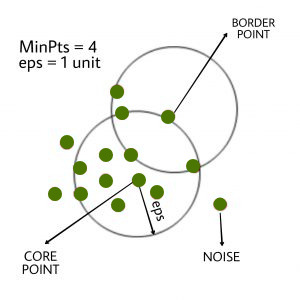

### DBSCAN Algorithm: 

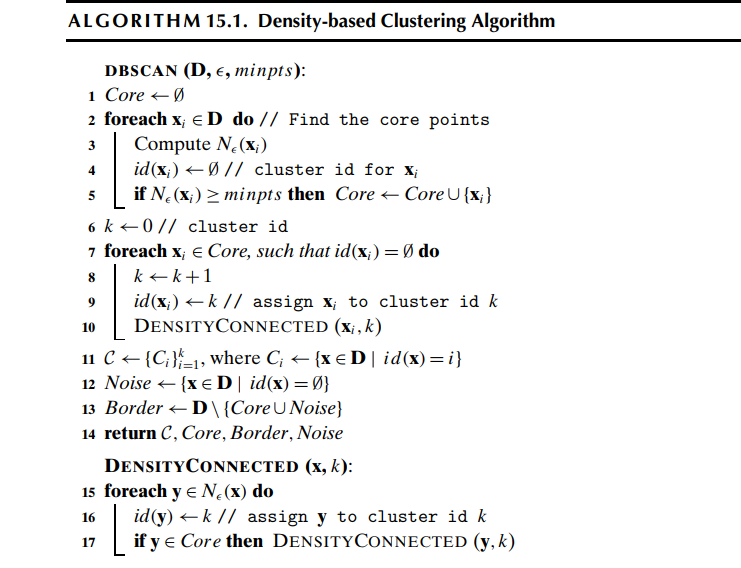

Taking only 0.025% from the training set

In [ ]:
D_train_db, D_test_db, y_train_db, y_test_db = train_test_split(D_train_s, y_train, train_size=0.0025, random_state=42, stratify = y_train)

-1 indicates the points which not belong to any cluster (noise).

0 indicates the points which is not determined yet.

P is each point we check the epsilon and minimum points around it to determine if it is core or border point.



In [ ]:
def DBSCAN(data, eps, Minpoints):  
    labels = [0]*len(data)
# C is the ID of the current cluster.    
    C = 0
    for P in range(0, len(data)):
        if not (labels[P] == 0):
           continue
        NeighborPts = regionQuery(data, P, eps)
        if len(NeighborPts) < Minpoints:
            labels[P] = -1    
        else: 
           C += 1
           growCluster(data, labels, P, NeighborPts, C, eps, Minpoints)
    return labels

# Assign the cluster label to the point
def growCluster(data, labels, P, NeighborPts, C, eps, MinPts):
    labels[P] = C
    i = 0
    while i < len(NeighborPts):    
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
        if labels[Pn] == -1:
           labels[Pn] = C
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C)
            labels[Pn] = C
            # Find all the neighbors of the checked point pn
            PnNeighborPts = regionQuery(data, Pn, eps) 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            #else:
                # continue              
        i += 1        

#cluster the labels which is near to the core point together
def regionQuery(data, P, eps):
    neighbors = []
    for Pn in range(0, len(data)):
        # If the distance is less than epsilon, add it to same neighbourhood.
        if np.linalg.norm(data[P] - data[Pn]) < eps:
           neighbors.append(Pn)
    return neighbors

In [ ]:
labels=DBSCAN(D_train_db,0.99,7)
print(labels)
print(np.unique(labels))

[1, -1, 2, 3, 3, 3, 3, -1, 3, 4, 3, 2, 1, 4, 3, 2, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 5, 4, 4, 3, 2, 3, 2, 2, 4, 3, 4, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 3, -1, 3, 3, 3, 2, 3, 3, 5, 3, -1, 5, 2, 4, 3, 4, 5, 3, 3, 3, 3, 3, 3, 3, 4, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, -1, 3, 4, 4, 3, 4, 3, 3, 4, 3, 3, 2, 5, 3, 5, 3, 3, 3, 2, 2, 6, 5, 3, 3, 6, 4, 2, 3, 3, 2, 3, 5, 3, 3, 3, 3, 3, 3, 3, 5, 3, 4, 3, 2, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 5, 2, -1, 4, 3, 4, 3, 3, 1, 3, 4, 3, 3, 2, 3, 3, 3, 5, 6, 2, 2, 3, 3, 3, 3, 3, 2, 1, 3, 5, 4, 5, 3, 3, 3, 3, 5, 2, 3, 3, 3, 3, 3, 3, 4, 3, 5, 2, 4, 5, 2, 3, 2, 3, 3, 4, 4, 2, 3, -1, 4, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 6, 3, 4, 3, 5, 4, 2, 3, -1, -1, 3, 2, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, -1, 3, 5, 4, 3, 3, 3, 3, 2, 3, 5, 3, 3, 3, 3, 2, 3, 1, 2, 3, -1, 3, 3, 2, 3, 2, 4, 3, 4, 2, 5, 2, 2, 4, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 5, 3, 3, 3, 3, 3, 2, 3, 3, 3

In [ ]:

y_pred_db = labels

act_lbl_db = actual_clusters(len(list(np.unique(labels))),y_pred_db,y_train_db)
act_y_pred_db =  actual_labels(y_pred_db,act_lbl_db)
evaluate(y_pred_db,y_train_db,act_lbl_db)

For cluster : 1
 Precision =  0.9545454545454546
 Recall =  0.1728395061728395
 F1 Measure =  0.29268292682926833
 Conditional Entropy =  0.31221953325757146


For cluster : 2
 Precision =  0.9731182795698925
 Recall =  0.7448559670781894
 F1 Measure =  0.8438228438228439
 Conditional Entropy =  0.17850426252471427


For cluster : 3
 Precision =  1.0
 Recall =  1.0
 F1 Measure =  1.0
 Conditional Entropy =  0.0


For cluster : 4
 Precision =  1.0
 Recall =  0.7798507462686567
 F1 Measure =  0.8763102725366876
 Conditional Entropy =  0.0


For cluster : 5
 Precision =  1.0
 Recall =  0.22014925373134328
 F1 Measure =  0.3608562691131499
 Conditional Entropy =  0.0


For cluster : 6
 Precision =  1.0
 Recall =  0.03292181069958848
 F1 Measure =  0.06374501992031872
 Conditional Entropy =  0.0


For cluster : -1
 Precision =  0.4444444444444444
 Recall =  0.04938271604938271
 F1 Measure =  0.08888888888888889
 Conditional Entropy =  2.383068983003922


Total Meaures:

Precision = 0.910301

In [ ]:
from sklearn.metrics import precision_score,recall_score, accuracy_score,f1_score
print("acc:",accuracy_score(list(y_train_db),act_y_pred_db))
print("f1 macro:",f1_score(list(y_train_db),act_y_pred_db,average = 'macro'))
print("f1 weighted:",f1_score(list(y_train_db),act_y_pred_db,average = 'weighted'))
print("rec macro:",recall_score(list(y_train_db),act_y_pred_db,average = 'macro'))
print("rec weighted:",recall_score(list(y_train_db),act_y_pred_db,average = 'weighted'))
print("prec macro:",precision_score(list(y_train_db),act_y_pred_db,average = 'macro'))
print("prec weighted:",precision_score(list(y_train_db),act_y_pred_db,average = 'weighted'))

acc: 0.9821862348178138
f1 macro: 0.26879026485325697
f1 weighted: 0.9736650833625554
rec macro: 0.2727272727272727
rec weighted: 0.9821862348178138
prec macro: 0.26518010291595195
prec weighted: 0.965851348254526


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Agglomerative Hiearchical Clustering

Hiearchical Clustering is an algorithm that groups similar objects into groups called clusters. 

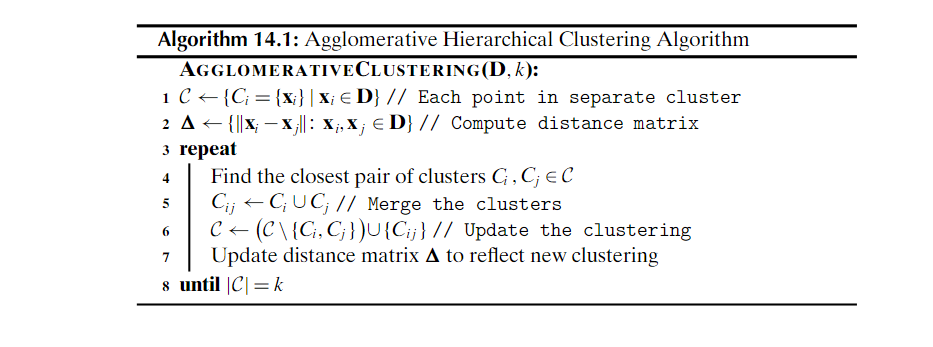

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

There are two ways for merging:

1.   Single linkage: It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other. we seek for minimum single linkage.
2.   Complete linkage:each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters until all elements end up being in the same cluster. The method is also known as farthest neighbour clustering. we seek for maximum complete linkage.



This implementation is bottom up approach of dynamic programming with single linkage as the type of merging.

In [ ]:
def Heirarchical(data, cutoff):
  dist= euclidean_distances(data, data)
  dist = np.tril(dist)
  dist[dist==0]= np.inf
  #print(dist.min())
  df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf)
  if cutoff > dist.shape[0]: #If user provides impractical cut-off, cluster everthing into one cluster and not listen to user 
    cutoff = dist.shape[0]
    print(cutoff)
  d = {} #This dictionary keeps record of which data points or cluster are merging, hence can be used to make a dendogram
  for i in range(0,cutoff):
    # np.unravel_index gives us the position of minimum distance.
    ij_min = np.unravel_index(dist.argmin(), dist.shape)
    #print(ij_min)
    if i == 0:
      df.iloc[ij_min[0]]=0
      df.iloc[ij_min[1]]=0
    else:
      try:
        a = int(df.iloc[int(ij_min[0])])
        #print("a try= ", a)
      except:
        df.iloc[int(ij_min[0])] = i
        a = i
        #print("a except= ", a)
      try:
        b = int(df.iloc[int(ij_min[1])])
        #print("b try= ", b)
      except:
        df.iloc[int(ij_min[1])] = i
        b = i
        df[(df[0]==a) | (df[0]==b)] = i
    d[i] = ij_min
    #print("d[i]= ",d)
    for j in range(0, ij_min[0]):
                #we want to ignore the diagonal, and diagonal is 0. We replaced 0 by infinte. 
                #So this if condition will skip diagonals
        if np.isfinite(dist[ij_min[0]][j]) and np.isfinite(dist[ij_min[1]][j]):
                    #after two points/cluster are linked, to calculate new distance we take minimum distance for single linkage
          dist[ij_min[1]][j] = min(dist[ij_min[0]][j], dist[ij_min[1]][j])
        #print(dist)
  # To avoid the combined data points/cluster in further calculations, we make them infinte.
  #Our if loop above this, will therefore skip the infinite record entries.
    dist[ij_min[0]] = np.inf
  return d, df[0].to_numpy()

In [ ]:
#Heirarchical(D_train_SC,10000)
d,y=Heirarchical(D_train_db,10000)
print(y)
print(d)
print(len(np.unique(y)))

1235
[ 795. 1208. 1020. ...  732. 1170.  576.]
{0: (28, 26), 1: (55, 26), 2: (59, 26), 3: (60, 26), 4: (96, 26), 5: (99, 26), 6: (100, 26), 7: (107, 26), 8: (138, 26), 9: (150, 26), 10: (169, 26), 11: (189, 26), 12: (197, 26), 13: (213, 26), 14: (227, 67), 15: (234, 67), 16: (248, 26), 17: (259, 26), 18: (280, 26), 19: (301, 26), 20: (311, 26), 21: (322, 26), 22: (324, 26), 23: (342, 26), 24: (346, 26), 25: (374, 26), 26: (387, 26), 27: (395, 26), 28: (453, 26), 29: (461, 26), 30: (468, 26), 31: (486, 67), 32: (490, 26), 33: (500, 26), 34: (511, 26), 35: (518, 26), 36: (523, 26), 37: (535, 26), 38: (549, 64), 39: (554, 26), 40: (597, 26), 41: (612, 26), 42: (624, 26), 43: (631, 26), 44: (679, 26), 45: (688, 26), 46: (693, 26), 47: (707, 26), 48: (726, 26), 49: (728, 26), 50: (731, 26), 51: (741, 609), 52: (744, 26), 53: (769, 26), 54: (783, 26), 55: (784, 26), 56: (790, 26), 57: (799, 26), 58: (806, 26), 59: (811, 26), 60: (825, 26), 61: (836, 26), 62: (841, 26), 63: (843, 26), 64: (84

In [ ]:
g = 0
for i in np.unique(y):
  y[y == i] = g
  g+=1

In [ ]:
print(sorted(np.unique(y)))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

In [ ]:
#for i in np.unique(y):
#  print(list(y).count(i))

In [ ]:
y_pred_hc = np.array(y, dtype = int)

act_lbl_hc = actual_clusters(len(list(np.unique(y))),y_pred_hc,y_train_db)
act_y_pred_hc =  actual_labels(y_pred_hc,act_lbl_hc)
evaluate(y_pred_hc,y_train_db,act_lbl_hc)

Streaming output truncated to the last 5000 lines.
 Precision =  1.0
 Recall =  0.0014245014245014246
 F1 Measure =  0.0028449502133712666
 Conditional Entropy =  0.0


For cluster : 311
 Precision =  1.0
 Recall =  0.0014245014245014246
 F1 Measure =  0.0028449502133712666
 Conditional Entropy =  0.0


For cluster : 312
 Precision =  1.0
 Recall =  0.0014245014245014246
 F1 Measure =  0.0028449502133712666
 Conditional Entropy =  0.0


For cluster : 313
 Precision =  1.0
 Recall =  0.0014245014245014246
 F1 Measure =  0.0028449502133712666
 Conditional Entropy =  0.0


For cluster : 314
 Precision =  1.0
 Recall =  0.0014245014245014246
 F1 Measure =  0.0028449502133712666
 Conditional Entropy =  0.0


For cluster : 315
 Precision =  1.0
 Recall =  0.0014245014245014246
 F1 Measure =  0.0028449502133712666
 Conditional Entropy =  0.0


For cluster : 316
 Precision =  1.0
 Recall =  0.0014245014245014246
 F1 Measure =  0.0028449502133712666
 Conditional Entropy =  0.0


For cluster : 3

### Built_in hiearchical clustering and dendrogram visualization.

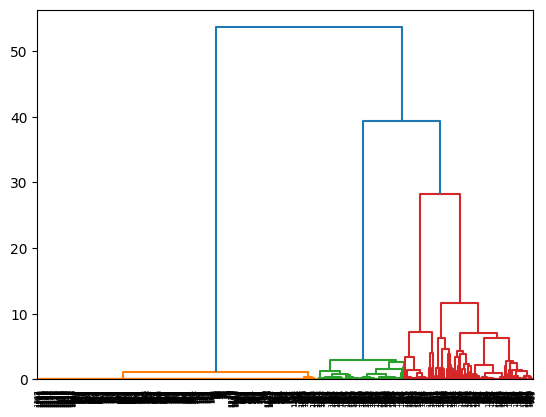

In [ ]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
import matplotlib.pyplot as plt
#plt.figure(figsize=(15,15))
dendrogram = sch.dendrogram(sch.linkage(D_train_db, method = 'ward')) 
plt.show()